In [1]:
import mplfinance as mpf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [2]:
API_key = 'MCO3JQL81ATB1YZ0'
time = TimeSeries(key = API_key,output_format='pandas')

In [3]:
ticker = 'TSLA'
data = time.get_intraday(symbol=ticker,interval='1min',outputsize='full')

In [4]:
df = data[0]
df = df.rename(columns={"1. open":"Open","2. high":"High","3. low":"Low","4. close":"Close","5. volume":"Volume"})
result = [group[1] for group in df.groupby(df.index.day)]

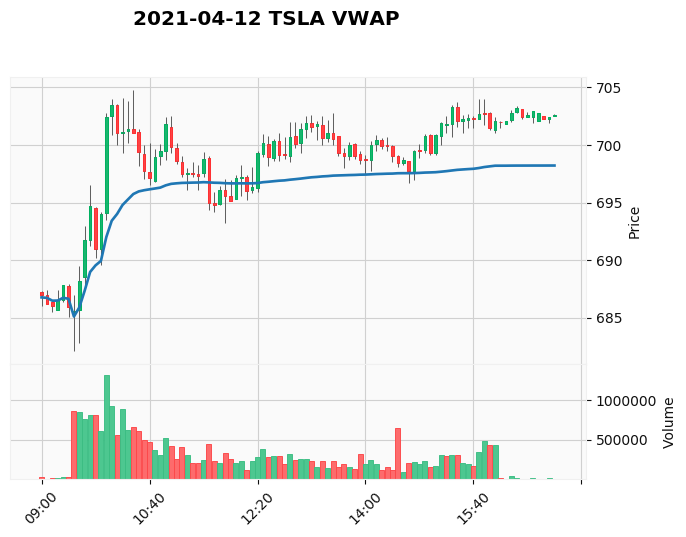

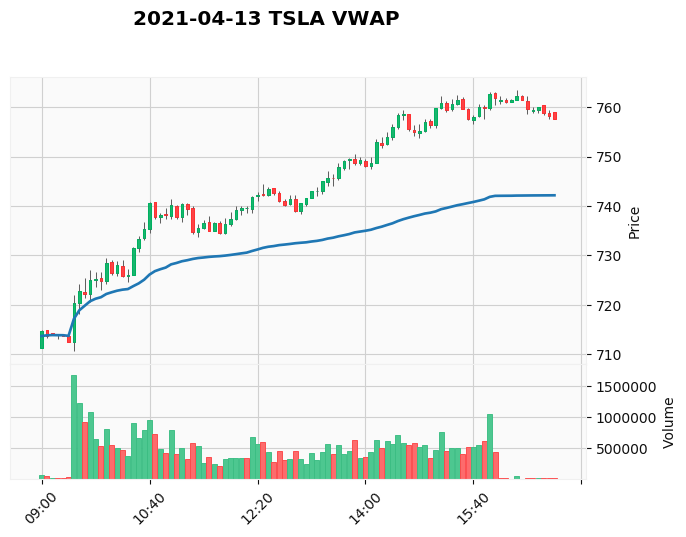

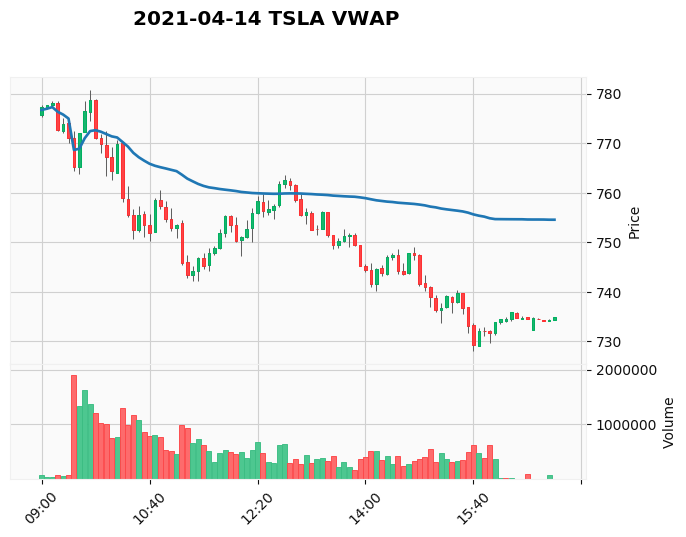

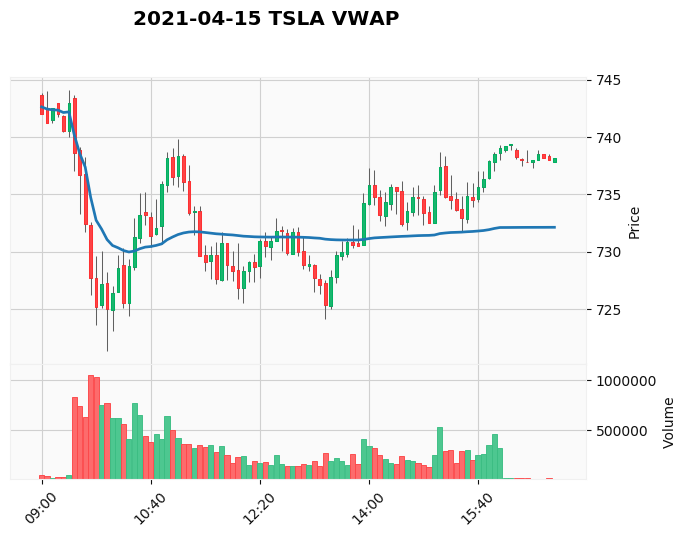

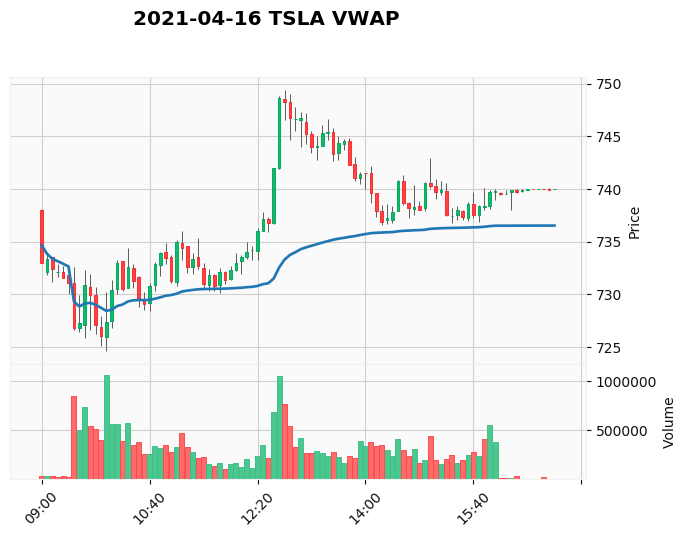

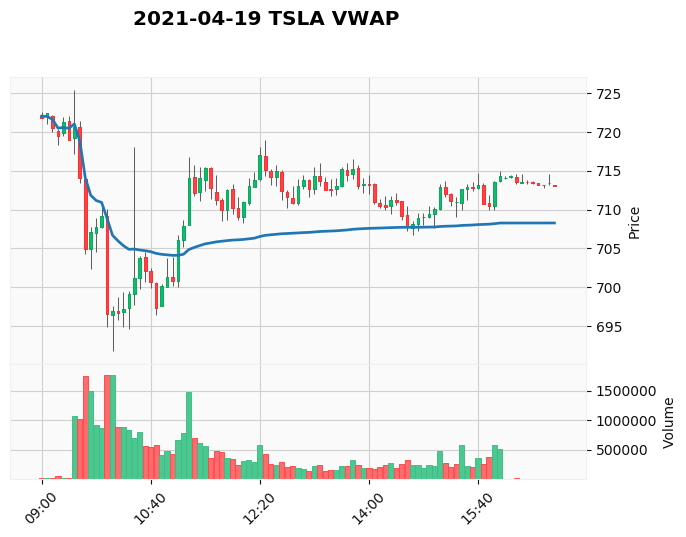

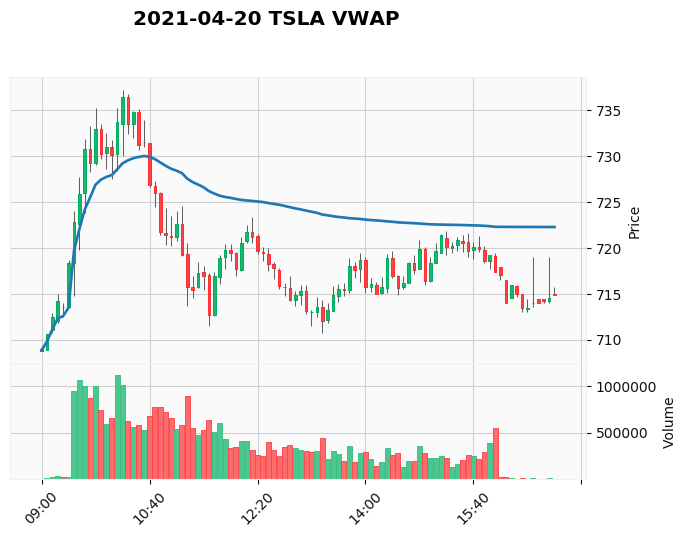

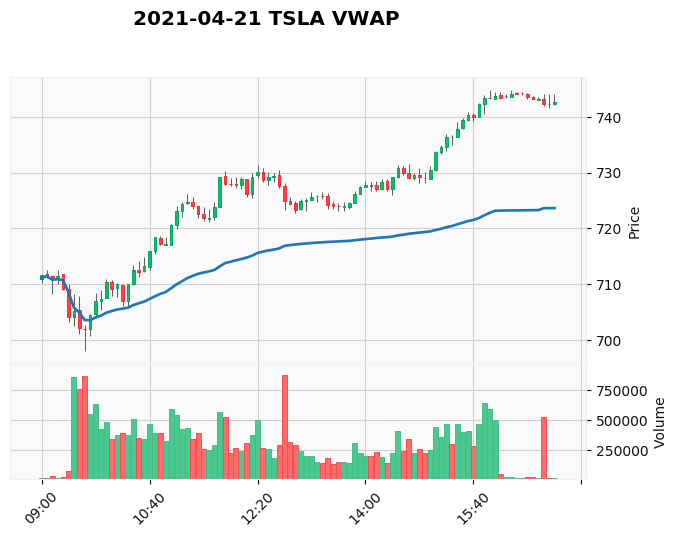

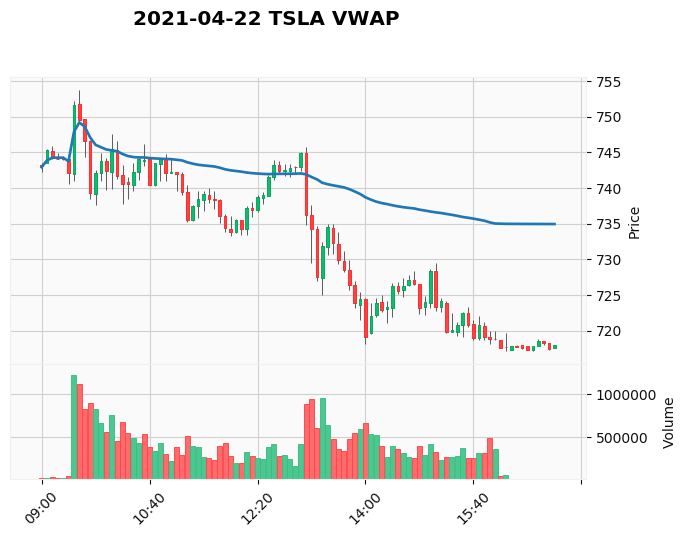

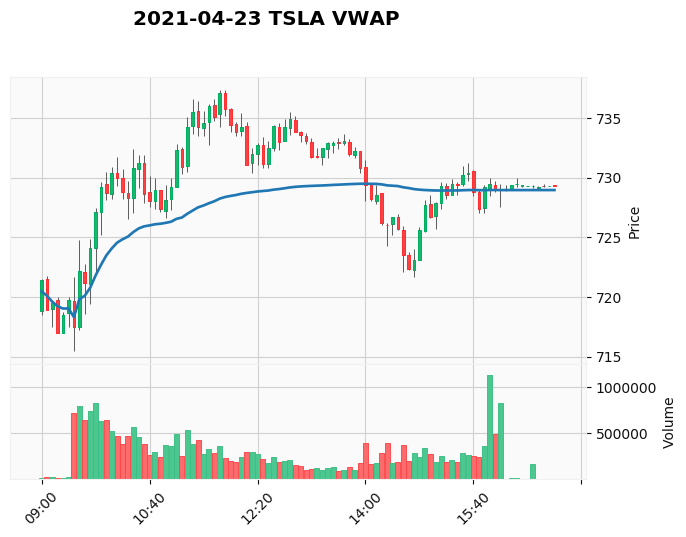

In [5]:
for df_vwap in result:
    df_vwap = df_vwap.loc[(df_vwap.index.hour >= 9)]
    df_vwap = df_vwap.loc[(df_vwap.index.hour <= 16)]
    df_vwap = df_vwap.resample('5T').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})
    df_vwap['VWAP'] = (((df_vwap['High']+df_vwap['Low']+df_vwap['Close'])*df_vwap['Volume']/3).cumsum())/df_vwap['Volume'].cumsum()
    df_vwap = df_vwap.dropna()
    vwap = mpf.make_addplot(df_vwap['VWAP'])
    mpf.plot(df_vwap,addplot=vwap,type='candle',style='yahoo',volume=True,title=f"{df_vwap.index.date[0]} {ticker} VWAP")